# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [43]:
import pandas as pd

#using read_csv() function to read in my local data file
df = pd.read_csv('/content/217795A_ALL_LATEST.csv')
#i am using shape function to get column and row count
df.shape

(3168, 12)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [44]:
#unique values from length of the groupby object, using count as the aggregation function
uniques = {}
for column in df.columns:
  uniques[column] = len(df.groupby(column).count())

print(uniques)
#got the max value using max() function and printed the associated column
most_unique_column = max(uniques, key=uniques.get)
print('column with most uniques is', most_unique_column)

{'IND_ID': 1, 'IND_CODE': 1, 'IND_UUID': 1, 'IND_PER_CODE': 1, 'DIM_TIME': 33, 'DIM_TIME_TYPE': 1, 'DIM_GEO_CODE_M49': 208, 'DIM_GEO_CODE_TYPE': 7, 'DIM_PUBLISH_STATE_CODE': 1, 'IND_NAME': 1, 'GEO_NAME_SHORT': 208, 'RATE_PER_10000_N': 3024}
column with most uniques is RATE_PER_10000_N


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [45]:
#initializing a redundant columns dictionary
redundant_columns = {}
#looped over all columns and chose only those which have only one unique value for each column
for column in df.columns:
  if len(df.groupby(column).count()) == 1:
    redundant_columns[column] = len(df.groupby(column).count())
#printing output
print(redundant_columns)

{'IND_ID': 1, 'IND_CODE': 1, 'IND_UUID': 1, 'IND_PER_CODE': 1, 'DIM_TIME_TYPE': 1, 'DIM_PUBLISH_STATE_CODE': 1, 'IND_NAME': 1}


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

<Axes: >

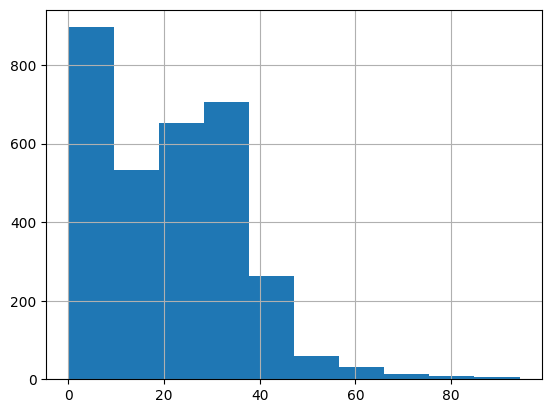

In [46]:
#using the rate_per_10000_N column from the data, which represents the rate per 10000 people of physicians in a given country.
df['RATE_PER_10000_N'].hist()

The graph shows a right-skewed histogram, with the majority of values falling below 40.

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

GEO_NAME_SHORT
Monaco        81.256286
Croatia       67.348800
Cuba          66.632833
Belgium       63.932000
Greece        54.537000
San Marino    51.667000
Georgia       51.436150
Portugal      49.310545
Austria       48.509095
Uruguay       46.995000
Name: RATE_PER_10000_N, dtype: float64


<Axes: title={'center': 'Countries with highest physician density rate'}, xlabel='Country', ylabel='Physician density rate'>

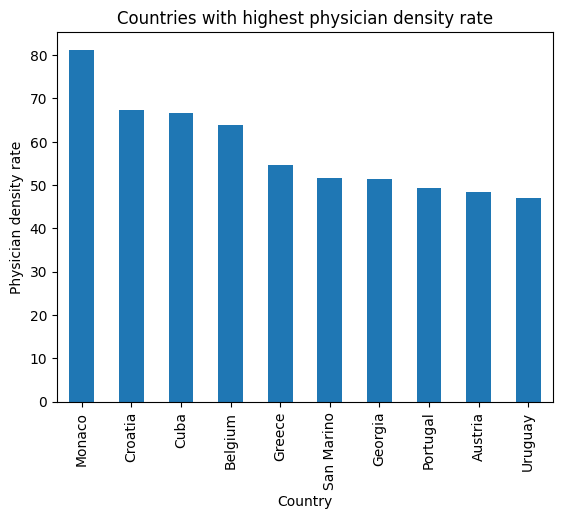

In [48]:
#first I group by country and find the mean value of physician density rate, then sort by descending to get the top 10 countries with highest rate.
df_high = df[df['RATE_PER_10000_N'] >= 40].groupby('GEO_NAME_SHORT')['RATE_PER_10000_N'].mean().sort_values(ascending=False).head(10)
print(df_high)
#finally representing the data in a simple bar plot for visualization purposes
ax = df_high.plot.bar(x='GEO_NAME_SHORT', y='RATE_PER_10000_N')
ax.set_title("Countries with highest physician density rate")
ax.set_xlabel("Country")
ax.set_ylabel("Physician density rate")
ax



---



## Submitting Your Work

Submit your work as usual.